# 2. Un problema de regresión

El objetivo es estimar el precio (price) de un diamante a partir de un conjunto de propiedades físicas del mismo:
* carat: peso del diamante
* cut: calidad del corte: Fair, Good, Very good, Premium, Ideal.
* color: desde color J (peor color) a D (mejor color)
* clarity: medida de la claridad del diamante (I1 (peor calidad), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (mejor claridad))
* x: longitud en mm
* y: anchura en mm.
* z: profundidad en mm
* depth: porcentaje de profundidad total 2 * z / (x + y)
* table: ancho de la punta del diamante relativa al punto más ancho.


## Importamos librerías

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

## Cargamos datos

In [2]:
diamonds = pd.read_csv("./diamonds.csv", sep=",", decimal='.')
diamonds.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

## Análisis exploratorio

In [3]:
#Eliminamos la primera columna, que es un índice secuencial sin valor añadido y colocamos la variable objetivo al final
diamonds = diamonds.drop("Unnamed: 0", axis=1)
diamonds = diamonds[['carat','cut','color','clarity','depth','table','x','y','z','price']]
diamonds.head()

carat      cut color clarity  depth  table     x     y     z  price
0   0.23    Ideal     E     SI2   61.5   55.0  3.95  3.98  2.43    326
1   0.21  Premium     E     SI1   59.8   61.0  3.89  3.84  2.31    326
2   0.23     Good     E     VS1   56.9   65.0  4.05  4.07  2.31    327
3   0.29  Premium     I     VS2   62.4   58.0  4.20  4.23  2.63    334
4   0.31     Good     J     SI2   63.3   58.0  4.34  4.35  2.75    335

In [4]:
#Buscamos datos descriptivos de cada columna, para hacernos una idea del dataset con el que trabajamos
diamonds.describe()

carat         depth         table             x             y  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184      5.731157      5.734526   
std        0.474011      1.432621      2.234491      1.121761      1.142135   
min        0.200000     43.000000     43.000000      0.000000      0.000000   
25%        0.400000     61.000000     56.000000      4.710000      4.720000   
50%        0.700000     61.800000     57.000000      5.700000      5.710000   
75%        1.040000     62.500000     59.000000      6.540000      6.540000   
max        5.010000     79.000000     95.000000     10.740000     58.900000   

                  z         price  
count  53940.000000  53940.000000  
mean       3.538734   3932.799722  
std        0.705699   3989.439738  
min        0.000000    326.000000  
25%        2.910000    950.000000  
50%        3.530000   2401.000000  
75%        4.040000   5324.250000  
max       31.800000  18823.000000

In [5]:
#Miramos el tamaño del dataset
diamonds.shape

(53940, 10)

In [6]:
#miramos tipología de datos, por si hay que transformar alguno
diamonds.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [7]:
#codificamos las variables categóricas. 
#Dado que tenemos orden de mejor a peor en todos los casos lo haremos con un mapeo, para evitar que se ordenen alfabéticamente

#creamos los diccionarios:
dict1 ={'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium':3, 'Ideal': 4}
dict2 ={'J': 0, 'I': 1, 'H': 2, 'G':3, 'F': 4, 'E': 5, 'D': 6}
dict3 ={'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2':3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}

#mapeamos:
diamonds['cut'] = diamonds['cut'].map(dict1)
diamonds['color'] = diamonds['color'].map(dict2)
diamonds['clarity'] = diamonds['clarity'].map(dict3)

Text(0,0.5,'price')

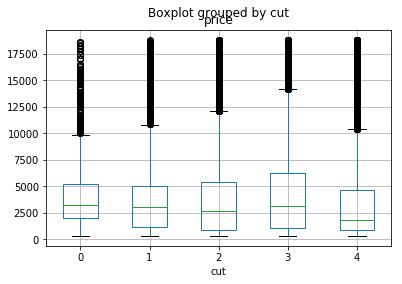

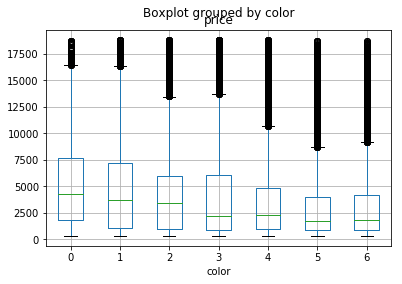

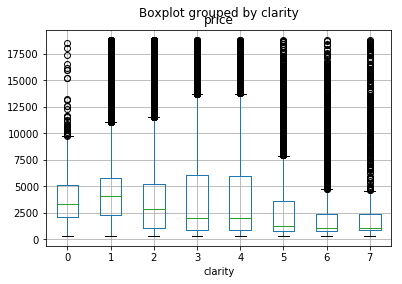

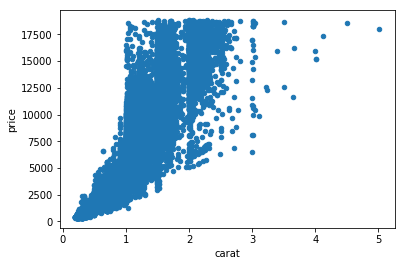

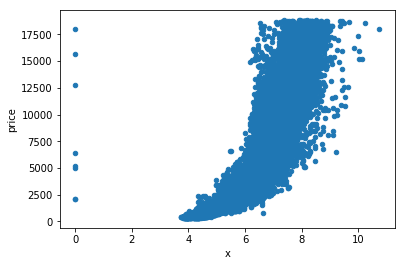

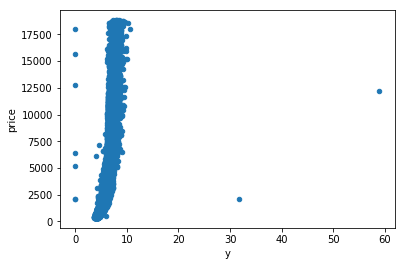

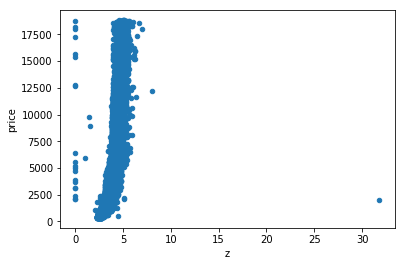

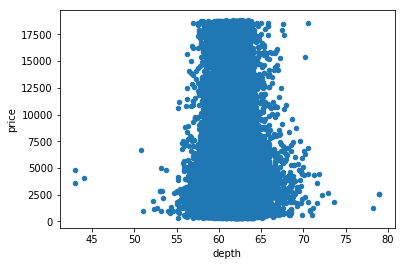

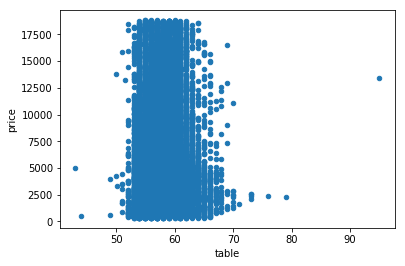

In [8]:
#buscamos outliers en precio con scatterplot respecto de las variables continuas y boxplot respecto de las discretas:

diamonds.boxplot(by = 'cut' ,column = 'price')

diamonds.boxplot(by = 'color' ,column = 'price')

diamonds.boxplot(by = 'clarity' ,column = 'price')


diamonds.plot(kind = 'scatter',x='carat',y = 'price')
plt.xlabel('carat')
plt.ylabel('price')

diamonds.plot(kind = 'scatter',x='x',y = 'price')
plt.xlabel('x')
plt.ylabel('price')

diamonds.plot(kind = 'scatter',x='y',y = 'price')
plt.xlabel('y')

diamonds.plot(kind = 'scatter',x='z',y = 'price')
plt.xlabel('z')
plt.ylabel('price')

diamonds.plot(kind = 'scatter',x='depth',y = 'price')
plt.xlabel('depth')
plt.ylabel('price')

diamonds.plot(kind = 'scatter',x='table',y = 'price')
plt.xlabel('table')
plt.ylabel('price')

#plt.subplots_adjust(top=0.92, bottom=0.1, left=0.10, right=0.95, hspace=0.25,
#                    wspace=0.35)




In [9]:
#Eliminamos outliers. En las discretas no quitamos nada, porque hay muchas muestras que salen como outliers
diamonds = diamonds[diamonds.carat < 4]

diamonds = diamonds[diamonds.x > 2.5]

diamonds = diamonds[diamonds.y < 15]

diamonds = diamonds[(diamonds.z > 1.5) & (diamonds.z < 7)]

diamonds = diamonds[(diamonds.depth > 50) & (diamonds.depth < 75)]

diamonds = diamonds[(diamonds.table > 50) & (diamonds.table < 70)]

In [10]:
#comprobamos que no hayamos borrado más de la cuenta
diamonds.shape

(53882, 10)

In [11]:
diamonds.describe().T

count         mean          std     min     25%      50%      75%  \
carat    53882.0     0.797242     0.472391    0.20    0.40     0.70     1.04   
cut      53882.0     2.905627     1.115008    0.00    2.00     3.00     4.00   
color    53882.0     3.406332     1.701210    0.00    2.00     3.00     5.00   
clarity  53882.0     3.052077     1.647033    0.00    2.00     3.00     4.00   
depth    53882.0    61.749968     1.418101   50.80   61.00    61.80    62.50   
table    53882.0    57.453060     2.211731   50.10   56.00    57.00    59.00   
x        53882.0     5.730914     1.118540    3.73    4.71     5.70     6.54   
y        53882.0     5.732793     1.110456    3.68    4.72     5.71     6.54   
z        53882.0     3.539069     0.690874    1.53    2.91     3.53     4.03   
price    53882.0  3929.461731  3985.378119  326.00  949.00  2400.00  5322.00   

              max  
carat        3.67  
cut          4.00  
color        6.00  
clarity      7.00  
depth       73.60  
table       69.00  
x            9.86  
y            9.81  
z            6.38  
price    18823.00

Hasta aquí, hemos dejado el dataset más limpio, aunque no tiene una gran afectación en los valores estadísticos analizados, salvo que hemos eliminado muestras de tamaño 0, poco creíbles

In [12]:
#Analizamos correlación entre variables:
diamonds.corr()

carat       cut     color   clarity     depth     table         x  \
carat    1.000000 -0.134261 -0.290949 -0.352371  0.028140  0.182847  0.978355   
cut     -0.134261  1.000000  0.020402  0.188841 -0.220597 -0.433427 -0.125698   
color   -0.290949  0.020402  1.000000 -0.026079 -0.048848 -0.026939 -0.270194   
clarity -0.352371  0.188841 -0.026079  1.000000 -0.067685 -0.160978 -0.372467   
depth    0.028140 -0.220597 -0.048848 -0.067685  1.000000 -0.302535 -0.024858   
table    0.182847 -0.433427 -0.026939 -0.160978 -0.302535  1.000000  0.197166   
x        0.978355 -0.125698 -0.270194 -0.372467 -0.024858  0.197166  1.000000   
y        0.977458 -0.125435 -0.270007 -0.367139 -0.028025  0.191122  0.998658   
z        0.977312 -0.151803 -0.274625 -0.376093  0.096962  0.156732  0.991497   
price    0.922282 -0.053202 -0.171970 -0.146227 -0.010917  0.128175  0.887111   

                y         z     price  
carat    0.977458  0.977312  0.922282  
cut     -0.125435 -0.151803 -0.053202  
color   -0.270007 -0.274625 -0.171970  
clarity -0.367139 -0.376093 -0.146227  
depth   -0.028025  0.096962 -0.010917  
table    0.191122  0.156732  0.128175  
x        0.998658  0.991497  0.887111  
y        1.000000  0.991150  0.888698  
z        0.991150  1.000000  0.882362  
price    0.888698  0.882362  1.000000

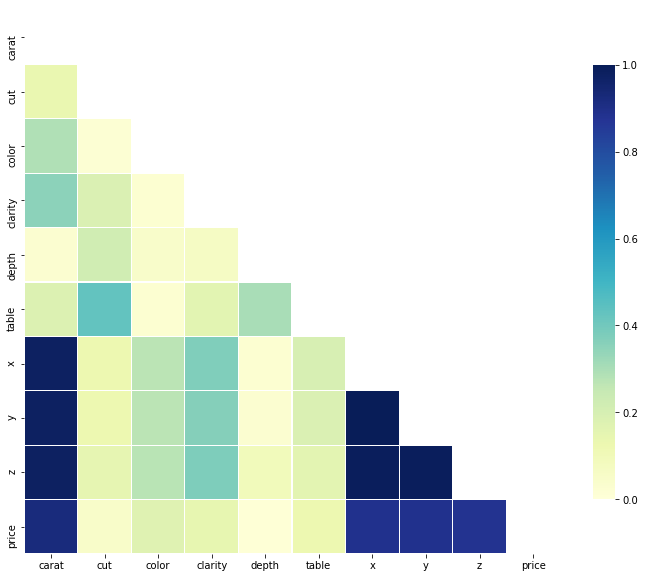

In [13]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(diamonds.corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Hay una correlación altísima entre x, y, z y carat (entre todas ellas por parejas). Tiene sentido, al tratarse de las dimensiones y peso del diamante. Además, hay una correlación enorme de carat con el precio, analizaremos pero parece una variable determinante. Eliminamos x, y, z y nos quedamos solo con carat

In [14]:
diamonds = diamonds.drop(['x', 'y', 'z'], axis=1)
diamonds.head(5)

carat  cut  color  clarity  depth  table  price
0   0.23    4      5        1   61.5   55.0    326
1   0.21    3      5        2   59.8   61.0    326
2   0.23    1      5        4   56.9   65.0    327
3   0.29    3      1        3   62.4   58.0    334
4   0.31    1      0        1   63.3   58.0    335

## Filtrado de características

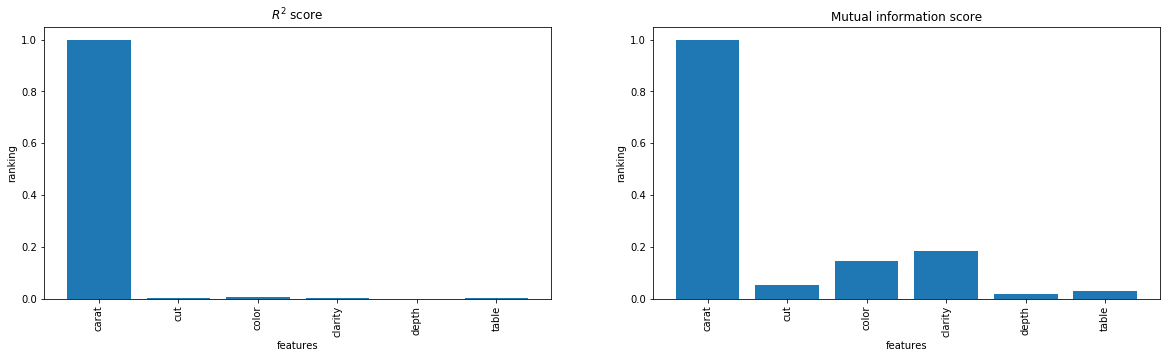

In [15]:
# convertimos el DataFrame al formato necesario para scikit-learn
diamonds_M = diamonds.as_matrix() 

#cogemos price
y = diamonds_M[:,-1]
#cogemos el resto
X = diamonds_M[:,0:-1]

feature_names = diamonds.columns[0:-1]

from sklearn.feature_selection import f_regression, mutual_info_regression

f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)


plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X.shape[1]),f_test,  align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('ranking')
plt.title('$R^2$ score')

plt.subplot(1,2,2)
plt.bar(range(X.shape[1]),mi, align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('ranking')
plt.title('Mutual information score')

plt.show()

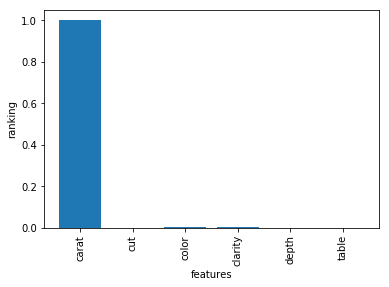

In [16]:
#parece evidente que la predominante es carat, pero vamos a ver el efecto combinado:

mi_relevancia = f_test*mi
mi_relevancia = mi_relevancia/np.max(mi_relevancia)

plt.bar(range(X.shape[1]),mi_relevancia, align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('ranking')

plt.show()

Parece que con concat en exclusiva deberíamos explicar todo o casi todo. Vamos a aplicar un método de selección de características, para ver si nos quedamos con alguna más

In [17]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

#dividimos los datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print('Datos train: ', X_train.shape)
print('Datos test: ', X_test.shape)

#escalamos y estandarizamos para poder entrenar varios algoritmos sin diferencias
scaler = preprocessing.StandardScaler().fit(X_train)

Xs_train = scaler.transform(X_train)
Xs_test = scaler.transform(X_test)

Datos train:  (40411, 6)
Datos test:  (13471, 6)


best mean cross-validation score: -1483818.681
best parameters: {'alpha': 0.029763514416313176}


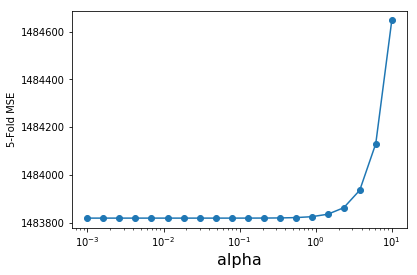

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-3,1,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5)
grid.fit(Xs_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error

#aumentamos alpha. Crecerá el error, pero visto el gráfico parece asumible, y eliminará características
alpha_optimo = grid.best_params_['alpha']*10000
lasso = Lasso(alpha = alpha_optimo).fit(Xs_train,y_train)

ytrainLasso = lasso.predict(Xs_train)
ytestLasso  = lasso.predict(Xs_test)
mseTrainModelLasso = np.sqrt(mean_squared_error(y_train,ytrainLasso))
mseTestModelLasso = np.sqrt(mean_squared_error(y_test,ytestLasso))

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 1.42e+03
MSE Modelo Lasso (test) : 1.45e+03
carat 3508.823157895157
cut 0.0
color 43.54585078705816
clarity 351.6729133145946
depth -0.0
table -0.0


Nos vamos a quedar con las variables carat, clarity y color. En la representación anterior y en esta parecen las relevantes (menos la de color, pero nos la quedamos igual, al ser pocas...) Si no llegamos a métricas buenas, volvemos atrás y cogemos todas las variables

In [20]:
diamonds_2 = diamonds[['carat', 'color', 'clarity', 'price']]
diamonds_2.head()

carat  color  clarity  price
0   0.23      5        1    326
1   0.21      5        2    326
2   0.23      5        4    327
3   0.29      1        3    334
4   0.31      0        1    335

## Contraste de modelos

### 1. Regresión lineal

In [21]:
# convertimos el DataFrame al formato necesario para scikit-learn
diamonds_2_M = diamonds_2.as_matrix() 

#cogemos price
y_2 = diamonds_2_M[:,-1]
#cogemos el resto
X_2 = diamonds_2_M[:,0:-1]

feature_names_2 = diamonds_2.columns[0:-1]

#dividimos los datos en entrenamiento y test
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.25, random_state = 0)

print('Datos train: ', X_train_2.shape)
print('Datos test: ', X_test_2.shape)

#escalamos y estandarizamos para poder entrenar varios algoritmos sin diferencias
scaler = preprocessing.StandardScaler().fit(X_train_2)

Xs_train_2 = scaler.transform(X_train_2)
Xs_test_2 = scaler.transform(X_test_2)



Datos train:  (40411, 3)
Datos test:  (13471, 3)


In [22]:
from sklearn.linear_model import LinearRegression 

lr = LinearRegression().fit(Xs_train_2, y_train_2)

print("R2 Train: ",lr.score(Xs_train_2,y_train_2))
print("R2 Test: ", lr.score(Xs_test_2,y_test_2))


R2 Train:  0.9041415322001813
R2 Test:  0.9030016322272406


No hay overfitting (las métricas de train y test son muy parecidas), y para ser un modelo sencillo la precisión es muy alta (esperado, por lo que habíamos visto de la alta correlación entre price y carat). Aumentemos la complejidad, a ver dónde llegamos

### 2. Árbol de regresión

best mean cross-validation score: 0.976
best parameters: {'max_depth': 11}


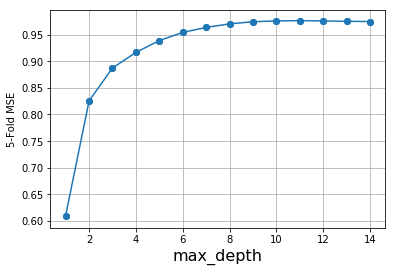

In [23]:
from sklearn.tree import DecisionTreeRegressor

#buscamos la profundidad óptima usando este algoritmo, respecto de la métrica de R2
maxDepth = range(1,15)
param_grid = {'max_depth': maxDepth }

grid = GridSearchCV(DecisionTreeRegressor(random_state=0),
                    scoring='r2',
                    param_grid=param_grid,
                    cv = 5)
grid.fit(Xs_train_2, y_train_2)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = grid.cv_results_['mean_test_score']
std_scores = grid.cv_results_['std_test_score']
plt.plot(maxDepth,scores,'-o')
plt.errorbar(maxDepth, scores, yerr=std_scores, fmt='o', ecolor='g')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.grid()
plt.show()


In [24]:
#miramos precisión de train y test con el óptimo obtenido
maxDepthOptimo = grid.best_params_['max_depth']
tree = DecisionTreeRegressor(max_depth=maxDepthOptimo).fit(Xs_train_2,y_train_2)

print("R2 Train: ",tree.score(Xs_train_2,y_train_2))
print("R2 Test: ", tree.score(Xs_test_2,y_test_2))

R2 Train:  0.9823724529675529
R2 Test:  0.9766835840029778


In [25]:
#pintamos el árbol
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree, out_file=None, 
                         feature_names=feature_names_2,
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data) 

graph


La precisión ha mejorado muchísimo con este algoritmo. Muy similar train y test, así que tampoco hay overfitting

### 3. Random Forest

best mean cross-validation score: 0.979
best parameters: {'max_depth': 11}


Text(0,0.5,'5-fold R2')

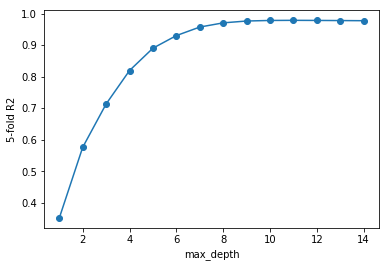

In [26]:
from sklearn.ensemble import RandomForestRegressor

# grid search
maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), 
                    param_grid=tuned_parameters,cv=5) 

grid.fit(Xs_train_2, y_train_2)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('5-fold R2')


In [27]:
#miramos precisión de train y test con el óptimo obtenido
maxDepth_opt = grid.best_params_['max_depth']
rf_reg_model = RandomForestRegressor(max_depth=maxDepth_opt,
                                    n_estimators=200,
                                    max_features='sqrt').fit(Xs_train_2,y_train_2)

print("R2 Train: ",rf_reg_model.score(Xs_train_2,y_train_2))
print("R2 Test: ",rf_reg_model.score(Xs_test_2,y_test_2))


R2 Train:  0.9832510330836652
R2 Test:  0.9781905635676378


Las métricas obtenidas son prácticamente idénticas a las que teníamos con el árbol

### 4. Boosted Trees

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

Niterations = [200, 300, 500]
learningRate = [0.1,0.001]

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=2), param_grid=param_grid, cv = 5)
grid.fit(Xs_train_2, y_train_2)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.972
best parameters: {'learning_rate': 0.1, 'n_estimators': 500}


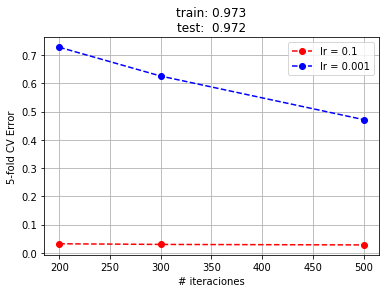

In [29]:
#miramos precisión de train y test con los valores obtenidos

bt = GradientBoostingRegressor(random_state=0, max_depth=2,learning_rate= 0.1, n_estimators= 500)
bt.fit(Xs_train_2,y_train_2)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(Xs_train_2,y_train_2),bt.score(Xs_test_2,y_test_2)))
plt.grid()
plt.show()

In [30]:
#Añadimos profundidad y aumentamos complejidad
Niterations = [500, 800, 1000]
learningRate = [0.1,0.001]

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 5)
grid.fit(Xs_train_2, y_train_2)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.978
best parameters: {'learning_rate': 0.1, 'n_estimators': 800}


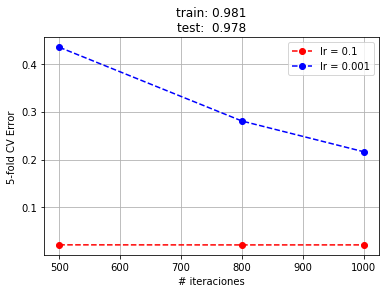

In [31]:
#miramos precisión de train y test con los valores obtenidos

bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate= 0.1, n_estimators= 800)
bt.fit(Xs_train_2,y_train_2)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(Xs_train_2,y_train_2),bt.score(Xs_test_2,y_test_2)))
plt.grid()
plt.show()

In [32]:
#he hecho varias pruebas aumentando el número de stages, pero no he obtenido movimientos significativos
bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate= 0.1, n_estimators= 4000)
bt.fit(Xs_train_2,y_train_2)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
print("train: {:.3f}".format(bt.score(Xs_train_2,y_train_2)))
print("test: {:.3f}".format(bt.score(Xs_test_2,y_test_2)))

train: 0.983
test: 0.977


Las métricas son muy similares a las obtenidas con el resto de algoritmos. A continuación vamos a usar el que mejor prestaciones nos ha dado y lo vamos a entrenar con todas las variables, para ver si conseguimos mejorarlo un poco

### 5. Random Forest con todas las variables

best mean cross-validation score: 0.978
best parameters: {'max_depth': 14}


Text(0,0.5,'5-fold R2')

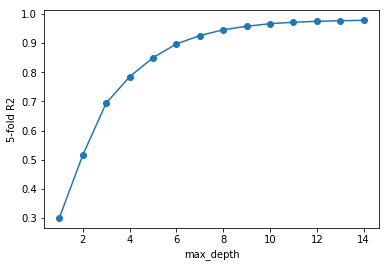

In [33]:
# grid search
maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), 
                    param_grid=tuned_parameters,cv=5) 

grid.fit(Xs_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('5-fold R2')


In [34]:
#miramos precisión de train y test con el óptimo obtenido
maxDepth_opt = grid.best_params_['max_depth']
rf_reg_model = RandomForestRegressor(max_depth=maxDepth_opt,
                                    n_estimators=200,
                                    max_features='sqrt').fit(Xs_train,y_train)

print("R2 Train: ",rf_reg_model.score(Xs_train,y_train))
print("R2 Test: ",rf_reg_model.score(Xs_test,y_test))


R2 Train:  0.989652177952661
R2 Test:  0.978952894610743


Efectivamente, parece que dejar todas las variables mejora la predicción. Cierto que hay algo más de overfitting (si podemos hablar de eso en estas magnitudes), pero la precisión es la mejor de los que hemos analizado